In [47]:
import numpy as np #import numpy
import pandas as pd #import pandas
import seaborn as sns # import seaborn
import matplotlib.pyplot as plt #import pyplot

from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import MinMaxScaler #for various scaling methods
from sklearn.linear_model import LogisticRegression #for LogisticRegression
from sklearn.naive_bayes import GaussianNB #for NaiveBayes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices


In [3]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv('classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,0.0,1025,10,99,2016,3,0


In [5]:
df.shape

(155223, 19)

In [5]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

In [6]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [7]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [8]:
df.shape

(75345, 19)

# **Model Building - without normalization**

## Feature Scaling

In [9]:
# Transfrom only continuous feature
feature_scale = [feature for feature in df.columns if feature in ['density_per_km','precipMM']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target','latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

,Target,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,pressure,visibility,winddirDegree,year,month,density_per_km,precipMM
0,1,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,1018,10,189,2016,3,0.505636,0.000000
1,0,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,1018,10,189,2016,3,0.505636,0.000000
2,0,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,1025,10,99,2016,3,0.505636,0.000000
3,1,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,1025,10,99,2016,3,0.505636,0.000000
4,0,-34.603684,-58.381559,22,18,0.0,8.6,26,15,17,61,78,1015,8,105,2016,4,0.505636,0.097011


# Train Test split

In [10]:
X = data.drop('Target',axis=1)
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10,stratify=y) #train test split in 50:50 ratio

# Models

In [26]:
# 1. Logistic Regression
logModel1 = LogisticRegression() 
logModel1.fit(X_train,y_train) 
logPred1 = logModel1.predict(X_test)
print('Accuracy of Logistic Regression :{:.4f}'.format(accuracy_score(y_test,logPred1)))

# 2. RidgeClassifier
ridgeModel1 = RidgeClassifier() 
ridgeModel1.fit(X_train,y_train) 
ridgepred1 = ridgeModel1.predict(X_test)
print('Accuracy of RidgeClassifier :{:.4f}'.format(accuracy_score(y_test,ridgepred1)))

# 3. Naive bayes
NBModel1 = GaussianNB()
NBModel1.fit(X_train,y_train) 
NBpred1 = NBModel1.predict(X_test)
NB_accuracy = accuracy_score(y_test,NBpred1)
print('Accuracy of Naive Bayes :{:.4f}'.format(NB_accuracy))

# 4. Random forest
randomModel1=RandomForestClassifier()
randomModel1.fit(X_train,y_train)
randompred1=randomModel1.predict(X_test)
print('Accuracy of Random forest :{:.4f}'.format(accuracy_score(y_test,randompred1)))

# 5. Decision Tree
dtreeModel1=DecisionTreeClassifier()
dtreeModel1.fit(X_train,y_train)
treepred1 = dtreeModel1.predict(X_test)
print('Accuracy of Decision Tree :{:.4f}'.format(accuracy_score(y_test,treepred1)))

Accuracy of Logistic Regression :0.5674
Accuracy of RidgeClassifier :0.5697
Accuracy of Naive Bayes :0.5511
Accuracy of Random forest :0.4358
Accuracy of Decision Tree :0.4206


In [27]:
# 6. XGBoost
xgboostModel1 = XGBClassifier()
xgboostModel1.fit(X_train, y_train)
xgpred1 = xgboostModel1.predict(X_test)
print('Accuracy of XGBoost :{:.4f}'.format(accuracy_score(y_test,xgpred1)))
print('Accuracy of training data :{:.4f}'.format(xgboostModel1.score(X_train, y_train)))
print('Accuracy of testing data :{:.4f}'.format(xgboostModel1.score(X_test, y_test)))

[10:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost :0.5562
Accuracy of training data :0.7003
Accuracy of testing data :0.5562


In [45]:
# 7. AdaBoost
adaboostModel1 = AdaBoostClassifier(random_state=10)
adaboostModel1.fit(X_train, y_train)
adapred1 = adaboostModel1.predict(X_test)
print('Accuracy of AdaBoost :{:.4f}'.format(accuracy_score(y_test,adapred1)))
print('Accuracy of training data :{:.4f}'.format(adaboostModel1.score(X_train, y_train)))
print('Accuracy of testing data :{:.4f}'.format(adaboostModel1.score(X_test, y_test)))

Accuracy of AdaBoost :0.5950
Accuracy of training data :0.6028
Accuracy of testing data :0.5950


In [24]:
# 8 . CatBoostClassifier
from catboost import CatBoostClassifier

# Initiate the Catboost Classifier
# this is a binary classification problem I will use log loss as the loss function and evaluate based on accuracy
catModel1 = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy')
catModel1.fit(X_train,y_train)

Learning rate set to 0.048517
0:	learn: 0.5857401	total: 19.5ms	remaining: 19.5s
1:	learn: 0.5856604	total: 36ms	remaining: 18s
2:	learn: 0.5894298	total: 51.8ms	remaining: 17.2s
3:	learn: 0.5885007	total: 69.7ms	remaining: 17.4s
4:	learn: 0.5914472	total: 86.1ms	remaining: 17.1s
5:	learn: 0.5908632	total: 102ms	remaining: 16.9s
6:	learn: 0.5932788	total: 119ms	remaining: 16.9s
7:	learn: 0.5927479	total: 136ms	remaining: 16.9s
8:	learn: 0.5943672	total: 153ms	remaining: 16.8s
9:	learn: 0.5943672	total: 169ms	remaining: 16.8s
10:	learn: 0.5941017	total: 187ms	remaining: 16.8s
11:	learn: 0.5968624	total: 209ms	remaining: 17.2s
12:	learn: 0.5958537	total: 228ms	remaining: 17.3s
13:	learn: 0.5962519	total: 245ms	remaining: 17.3s
14:	learn: 0.5958271	total: 261ms	remaining: 17.2s
15:	learn: 0.5975260	total: 277ms	remaining: 17.1s
16:	learn: 0.5979507	total: 294ms	remaining: 17s
17:	learn: 0.5977649	total: 310ms	remaining: 16.9s
18:	learn: 0.5973933	total: 327ms	remaining: 16.9s
19:	learn: 0

168:	learn: 0.6181780	total: 3.11s	remaining: 15.3s
169:	learn: 0.6182310	total: 3.13s	remaining: 15.3s
170:	learn: 0.6182045	total: 3.15s	remaining: 15.3s
171:	learn: 0.6179391	total: 3.17s	remaining: 15.3s
172:	learn: 0.6185230	total: 3.19s	remaining: 15.3s
173:	learn: 0.6187089	total: 3.21s	remaining: 15.2s
174:	learn: 0.6187619	total: 3.23s	remaining: 15.2s
175:	learn: 0.6191336	total: 3.25s	remaining: 15.2s
176:	learn: 0.6189743	total: 3.26s	remaining: 15.2s
177:	learn: 0.6192398	total: 3.28s	remaining: 15.2s
178:	learn: 0.6193990	total: 3.3s	remaining: 15.2s
179:	learn: 0.6191601	total: 3.32s	remaining: 15.1s
180:	learn: 0.6192398	total: 3.34s	remaining: 15.1s
181:	learn: 0.6191601	total: 3.36s	remaining: 15.1s
182:	learn: 0.6190539	total: 3.38s	remaining: 15.1s
183:	learn: 0.6195317	total: 3.39s	remaining: 15s
184:	learn: 0.6195583	total: 3.41s	remaining: 15s
185:	learn: 0.6195052	total: 3.42s	remaining: 15s
186:	learn: 0.6196379	total: 3.44s	remaining: 15s
187:	learn: 0.6196910

337:	learn: 0.6353525	total: 6.21s	remaining: 12.2s
338:	learn: 0.6353260	total: 6.22s	remaining: 12.1s
339:	learn: 0.6347951	total: 6.24s	remaining: 12.1s
340:	learn: 0.6351667	total: 6.26s	remaining: 12.1s
341:	learn: 0.6351932	total: 6.28s	remaining: 12.1s
342:	learn: 0.6353791	total: 6.3s	remaining: 12.1s
343:	learn: 0.6355649	total: 6.32s	remaining: 12s
344:	learn: 0.6356976	total: 6.33s	remaining: 12s
345:	learn: 0.6355383	total: 6.35s	remaining: 12s
346:	learn: 0.6356976	total: 6.37s	remaining: 12s
347:	learn: 0.6356711	total: 6.38s	remaining: 12s
348:	learn: 0.6360692	total: 6.4s	remaining: 11.9s
349:	learn: 0.6360692	total: 6.42s	remaining: 11.9s
350:	learn: 0.6365470	total: 6.44s	remaining: 11.9s
351:	learn: 0.6364409	total: 6.46s	remaining: 11.9s
352:	learn: 0.6363878	total: 6.47s	remaining: 11.9s
353:	learn: 0.6364939	total: 6.49s	remaining: 11.8s
354:	learn: 0.6367063	total: 6.51s	remaining: 11.8s
355:	learn: 0.6366532	total: 6.53s	remaining: 11.8s
356:	learn: 0.6366798	to

496:	learn: 0.6480675	total: 9.09s	remaining: 9.2s
497:	learn: 0.6481737	total: 9.11s	remaining: 9.18s
498:	learn: 0.6482003	total: 9.13s	remaining: 9.16s
499:	learn: 0.6482268	total: 9.14s	remaining: 9.14s
500:	learn: 0.6485188	total: 9.16s	remaining: 9.12s
501:	learn: 0.6486781	total: 9.18s	remaining: 9.1s
502:	learn: 0.6486515	total: 9.19s	remaining: 9.08s
503:	learn: 0.6486515	total: 9.21s	remaining: 9.06s
504:	learn: 0.6486250	total: 9.22s	remaining: 9.04s
505:	learn: 0.6486781	total: 9.24s	remaining: 9.02s
506:	learn: 0.6486781	total: 9.26s	remaining: 9s
507:	learn: 0.6488904	total: 9.28s	remaining: 8.99s
508:	learn: 0.6489170	total: 9.29s	remaining: 8.97s
509:	learn: 0.6489966	total: 9.32s	remaining: 8.95s
510:	learn: 0.6491293	total: 9.34s	remaining: 8.94s
511:	learn: 0.6491824	total: 9.35s	remaining: 8.91s
512:	learn: 0.6491559	total: 9.37s	remaining: 8.89s
513:	learn: 0.6492621	total: 9.39s	remaining: 8.88s
514:	learn: 0.6492621	total: 9.4s	remaining: 8.86s
515:	learn: 0.6493

656:	learn: 0.6586059	total: 11.9s	remaining: 6.23s
657:	learn: 0.6585793	total: 12s	remaining: 6.21s
658:	learn: 0.6586855	total: 12s	remaining: 6.19s
659:	learn: 0.6588448	total: 12s	remaining: 6.17s
660:	learn: 0.6588979	total: 12s	remaining: 6.16s
661:	learn: 0.6590040	total: 12s	remaining: 6.14s
662:	learn: 0.6592429	total: 12s	remaining: 6.12s
663:	learn: 0.6590306	total: 12.1s	remaining: 6.1s
664:	learn: 0.6592429	total: 12.1s	remaining: 6.08s
665:	learn: 0.6592695	total: 12.1s	remaining: 6.07s
666:	learn: 0.6592164	total: 12.1s	remaining: 6.05s
667:	learn: 0.6592429	total: 12.1s	remaining: 6.03s
668:	learn: 0.6592695	total: 12.2s	remaining: 6.01s
669:	learn: 0.6593491	total: 12.2s	remaining: 5.99s
670:	learn: 0.6597473	total: 12.2s	remaining: 5.98s
671:	learn: 0.6596146	total: 12.2s	remaining: 5.96s
672:	learn: 0.6596146	total: 12.2s	remaining: 5.94s
673:	learn: 0.6598535	total: 12.2s	remaining: 5.92s
674:	learn: 0.6600393	total: 12.3s	remaining: 5.9s
675:	learn: 0.6600393	tota

822:	learn: 0.6684009	total: 15s	remaining: 3.23s
823:	learn: 0.6685071	total: 15s	remaining: 3.21s
824:	learn: 0.6686929	total: 15s	remaining: 3.19s
825:	learn: 0.6685867	total: 15.1s	remaining: 3.17s
826:	learn: 0.6684009	total: 15.1s	remaining: 3.15s
827:	learn: 0.6685337	total: 15.1s	remaining: 3.13s
828:	learn: 0.6685602	total: 15.1s	remaining: 3.12s
829:	learn: 0.6685071	total: 15.1s	remaining: 3.1s
830:	learn: 0.6687460	total: 15.1s	remaining: 3.08s
831:	learn: 0.6686929	total: 15.2s	remaining: 3.06s
832:	learn: 0.6688257	total: 15.2s	remaining: 3.04s
833:	learn: 0.6688257	total: 15.2s	remaining: 3.02s
834:	learn: 0.6690380	total: 15.2s	remaining: 3s
835:	learn: 0.6690911	total: 15.2s	remaining: 2.99s
836:	learn: 0.6690911	total: 15.3s	remaining: 2.97s
837:	learn: 0.6691176	total: 15.3s	remaining: 2.95s
838:	learn: 0.6691973	total: 15.3s	remaining: 2.93s
839:	learn: 0.6693566	total: 15.3s	remaining: 2.92s
840:	learn: 0.6695158	total: 15.3s	remaining: 2.9s
841:	learn: 0.6692769	t

990:	learn: 0.6766564	total: 18.3s	remaining: 166ms
991:	learn: 0.6769219	total: 18.4s	remaining: 148ms
992:	learn: 0.6769749	total: 18.4s	remaining: 130ms
993:	learn: 0.6769219	total: 18.4s	remaining: 111ms
994:	learn: 0.6769484	total: 18.4s	remaining: 92.5ms
995:	learn: 0.6768157	total: 18.4s	remaining: 74ms
996:	learn: 0.6768422	total: 18.4s	remaining: 55.5ms
997:	learn: 0.6768953	total: 18.5s	remaining: 37ms
998:	learn: 0.6768953	total: 18.5s	remaining: 18.5ms
999:	learn: 0.6766829	total: 18.5s	remaining: 0us


In [34]:
catpredTrain = catModel1.predict(X_train)
print('Accuracy of Training data :{:.4f}'.format(accuracy_score(y_train,catpredTrain)))

catpredTest = catModel1.predict(X_test)
print('\nAccuracy of Testing data :{:.4f}'.format(accuracy_score(y_test,catpredTest)))

Accuracy of Training data :0.6767

Accuracy of Testing data :0.5766


# **Model Building - with normalization**

# Feature Scaling

In [35]:
feature_scale = [feature for feature in df.columns if feature not in ['Target']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
scaled_data = pd.concat([df[['Target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

scaled_data.head()

,Target,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
0,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.000000,0.602941,1.0,0.531429,0.333333,0.181818
1,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.000000,0.602941,1.0,0.531429,0.333333,0.181818
2,0,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.000000,0.705882,1.0,0.274286,0.333333,0.181818
3,1,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.000000,0.705882,1.0,0.274286,0.333333,0.181818
4,0,0.505636,0.196981,0.742734,0.611940,0.731343,0.0,0.432258,0.26,0.792453,0.175824,0.61,0.763441,0.097011,0.558824,0.8,0.291429,0.333333,0.272727


# Train Test split

In [36]:
X = scaled_data.drop('Target',axis=1)
y = scaled_data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10) #train test split in 50:50 ratio

In [37]:
X_train.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
18866,0.000897,0.596817,0.573923,0.656716,0.656716,0.0,0.625806,0.11,0.830189,0.054945,0.40,0.892473,0.149179,0.514706,0.6,0.700000,0.333333,0.272727
39309,0.011305,0.643994,0.554194,0.537313,0.611940,0.0,0.625806,0.53,0.698113,0.109890,0.20,0.720430,0.002931,0.558824,1.0,0.400000,0.333333,0.636364
70300,0.324189,0.622078,0.490980,0.731343,0.835821,0.0,0.645161,0.56,0.943396,0.109890,0.37,0.774194,0.000879,0.500000,1.0,0.451429,0.666667,0.454545
49555,0.003224,0.551994,0.534216,0.567164,0.656716,0.0,0.625806,0.36,0.754717,0.076923,0.41,0.849462,0.107855,0.573529,0.8,0.697143,0.333333,0.909091
27057,0.001310,0.539316,0.526928,0.611940,0.761194,0.0,0.380645,0.48,0.905660,0.054945,0.75,0.978495,0.036928,0.573529,0.9,0.388571,0.333333,0.363636


# Models

In [39]:
# 1. Logistic Regression
logModel2 = LogisticRegression() 
logModel2.fit(X_train,y_train) 
logPred2 = logModel2.predict(X_test)
print('Accuracy of Logistic Regression :{:.4f}'.format(accuracy_score(y_test,logPred2)))

# 2. RidgeClassifier
ridgeModel2 = RidgeClassifier() 
ridgeModel2.fit(X_train,y_train) 
ridgepred2 = ridgeModel2.predict(X_test)
print('Accuracy of RidgeClassifier :{:.4f}'.format(accuracy_score(y_test,ridgepred2)))

# 3. Naive bayes
NBModel2 = GaussianNB()
NBModel2.fit(X_train,y_train) 
NBpred2 = NBModel2.predict(X_test)
NB_accuracy = accuracy_score(y_test,NBpred2)
print('Accuracy of Naive Bayes :{:.4f}'.format(NB_accuracy))

# 4. Random forest
randomModel2=RandomForestClassifier()
randomModel2.fit(X_train,y_train)
randompred2=randomModel2.predict(X_test)
print('Accuracy of Random forest :{:.4f}'.format(accuracy_score(y_test,randompred2)))

# 5. Decision Tree
dtreeModel2=DecisionTreeClassifier()
dtreeModel2.fit(X_train,y_train)
treepred2 = dtreeModel2.predict(X_test)
print('Accuracy of Decision Tree :{:.4f}'.format(accuracy_score(y_test,treepred2)))

Accuracy of Logistic Regression :0.5682
Accuracy of RidgeClassifier :0.5682
Accuracy of Naive Bayes :0.5578
Accuracy of Random forest :0.4377
Accuracy of Decision Tree :0.4246


In [41]:
# 6. XGBoost
xgboostModel2 = XGBClassifier()
xgboostModel2.fit(X_train, y_train)
xgpred2 = xgboostModel2.predict(X_test)
print('Accuracy of XGBoost :{:.4f}'.format(accuracy_score(y_test,xgpred2)))
print('Accuracy of training data :{:.4f}'.format(xgboostModel2.score(X_train, y_train)))
print('Accuracy of testing data :{:.4f}'.format(xgboostModel2.score(X_test, y_test)))

[11:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost :0.5524
Accuracy of training data :0.7043
Accuracy of testing data :0.5524


In [46]:
# 7. AdaBoost
adaboostModel2 = AdaBoostClassifier(random_state=10)
adaboostModel2.fit(X_train, y_train)
adapred2 = adaboostModel2.predict(X_test)
print('Accuracy of AdaBoost :{:.4f}'.format(accuracy_score(y_test,adapred2)))
print('Accuracy of training data :{:.4f}'.format(adaboostModel2.score(X_train, y_train)))
print('Accuracy of testing data :{:.4f}'.format(adaboostModel2.score(X_test, y_test)))

Accuracy of AdaBoost :0.5950
Accuracy of training data :0.6028
Accuracy of testing data :0.5950


In [43]:
# 8 . CatBoostClassifier
from catboost import CatBoostClassifier

# Initiate the Catboost Classifier
# this is a binary classification problem I will use log loss as the loss function and evaluate based on accuracy
catModel2 = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy')
catModel2.fit(X_train,y_train)

Learning rate set to 0.048517
0:	learn: 0.5905712	total: 17.5ms	remaining: 17.5s
1:	learn: 0.5938363	total: 34.3ms	remaining: 17.1s
2:	learn: 0.5973667	total: 50.7ms	remaining: 16.8s
3:	learn: 0.5985878	total: 67.6ms	remaining: 16.8s
4:	learn: 0.5988533	total: 83.9ms	remaining: 16.7s
5:	learn: 0.5979242	total: 100ms	remaining: 16.6s
6:	learn: 0.5993311	total: 116ms	remaining: 16.5s
7:	learn: 0.5991453	total: 133ms	remaining: 16.4s
8:	learn: 0.5989329	total: 146ms	remaining: 16.1s
9:	learn: 0.5987471	total: 163ms	remaining: 16.1s
10:	learn: 0.5999416	total: 179ms	remaining: 16.1s
11:	learn: 0.6005787	total: 206ms	remaining: 16.9s
12:	learn: 0.6006849	total: 224ms	remaining: 17s
13:	learn: 0.6004460	total: 243ms	remaining: 17.1s
14:	learn: 0.6003663	total: 259ms	remaining: 17s
15:	learn: 0.6013750	total: 276ms	remaining: 17s
16:	learn: 0.6006052	total: 292ms	remaining: 16.9s
17:	learn: 0.6010565	total: 308ms	remaining: 16.8s
18:	learn: 0.6012423	total: 324ms	remaining: 16.7s
19:	learn: 0

168:	learn: 0.6226906	total: 3.1s	remaining: 15.2s
169:	learn: 0.6227437	total: 3.12s	remaining: 15.2s
170:	learn: 0.6230357	total: 3.13s	remaining: 15.2s
171:	learn: 0.6227968	total: 3.15s	remaining: 15.2s
172:	learn: 0.6229030	total: 3.17s	remaining: 15.2s
173:	learn: 0.6229560	total: 3.19s	remaining: 15.1s
174:	learn: 0.6231949	total: 3.2s	remaining: 15.1s
175:	learn: 0.6232746	total: 3.22s	remaining: 15.1s
176:	learn: 0.6231684	total: 3.23s	remaining: 15s
177:	learn: 0.6231684	total: 3.25s	remaining: 15s
178:	learn: 0.6232480	total: 3.27s	remaining: 15s
179:	learn: 0.6231419	total: 3.28s	remaining: 15s
180:	learn: 0.6232215	total: 3.3s	remaining: 14.9s
181:	learn: 0.6231949	total: 3.32s	remaining: 14.9s
182:	learn: 0.6232480	total: 3.34s	remaining: 14.9s
183:	learn: 0.6231949	total: 3.36s	remaining: 14.9s
184:	learn: 0.6237524	total: 3.37s	remaining: 14.9s
185:	learn: 0.6236728	total: 3.39s	remaining: 14.8s
186:	learn: 0.6238586	total: 3.41s	remaining: 14.8s
187:	learn: 0.6238586	t

329:	learn: 0.6387237	total: 6.04s	remaining: 12.3s
330:	learn: 0.6389626	total: 6.06s	remaining: 12.3s
331:	learn: 0.6391750	total: 6.08s	remaining: 12.2s
332:	learn: 0.6392015	total: 6.1s	remaining: 12.2s
333:	learn: 0.6391219	total: 6.11s	remaining: 12.2s
334:	learn: 0.6390953	total: 6.13s	remaining: 12.2s
335:	learn: 0.6395732	total: 6.15s	remaining: 12.1s
336:	learn: 0.6394670	total: 6.16s	remaining: 12.1s
337:	learn: 0.6396262	total: 6.18s	remaining: 12.1s
338:	learn: 0.6398121	total: 6.2s	remaining: 12.1s
339:	learn: 0.6397855	total: 6.21s	remaining: 12.1s
340:	learn: 0.6399448	total: 6.23s	remaining: 12s
341:	learn: 0.6398652	total: 6.25s	remaining: 12s
342:	learn: 0.6397059	total: 6.27s	remaining: 12s
343:	learn: 0.6401837	total: 6.29s	remaining: 12s
344:	learn: 0.6399448	total: 6.3s	remaining: 12s
345:	learn: 0.6402102	total: 6.32s	remaining: 12s
346:	learn: 0.6403695	total: 6.34s	remaining: 11.9s
347:	learn: 0.6406084	total: 6.36s	remaining: 11.9s
348:	learn: 0.6408208	total

494:	learn: 0.6527925	total: 9.19s	remaining: 9.38s
495:	learn: 0.6527925	total: 9.22s	remaining: 9.37s
496:	learn: 0.6530845	total: 9.23s	remaining: 9.35s
497:	learn: 0.6531642	total: 9.26s	remaining: 9.33s
498:	learn: 0.6533765	total: 9.28s	remaining: 9.31s
499:	learn: 0.6534031	total: 9.31s	remaining: 9.31s
500:	learn: 0.6536154	total: 9.33s	remaining: 9.29s
501:	learn: 0.6536420	total: 9.35s	remaining: 9.28s
502:	learn: 0.6538278	total: 9.37s	remaining: 9.26s
503:	learn: 0.6538543	total: 9.39s	remaining: 9.24s
504:	learn: 0.6539605	total: 9.41s	remaining: 9.22s
505:	learn: 0.6541198	total: 9.43s	remaining: 9.2s
506:	learn: 0.6540932	total: 9.44s	remaining: 9.18s
507:	learn: 0.6538278	total: 9.46s	remaining: 9.16s
508:	learn: 0.6538809	total: 9.48s	remaining: 9.14s
509:	learn: 0.6540136	total: 9.5s	remaining: 9.12s
510:	learn: 0.6541729	total: 9.51s	remaining: 9.1s
511:	learn: 0.6543056	total: 9.53s	remaining: 9.08s
512:	learn: 0.6543852	total: 9.55s	remaining: 9.06s
513:	learn: 0.6

653:	learn: 0.6611276	total: 12s	remaining: 6.37s
654:	learn: 0.6611276	total: 12.1s	remaining: 6.35s
655:	learn: 0.6613134	total: 12.1s	remaining: 6.33s
656:	learn: 0.6613400	total: 12.1s	remaining: 6.31s
657:	learn: 0.6613400	total: 12.1s	remaining: 6.29s
658:	learn: 0.6613400	total: 12.1s	remaining: 6.27s
659:	learn: 0.6612604	total: 12.1s	remaining: 6.25s
660:	learn: 0.6614462	total: 12.2s	remaining: 6.23s
661:	learn: 0.6615523	total: 12.2s	remaining: 6.21s
662:	learn: 0.6616585	total: 12.2s	remaining: 6.2s
663:	learn: 0.6618178	total: 12.2s	remaining: 6.18s
664:	learn: 0.6619505	total: 12.2s	remaining: 6.17s
665:	learn: 0.6617913	total: 12.3s	remaining: 6.15s
666:	learn: 0.6618443	total: 12.3s	remaining: 6.14s
667:	learn: 0.6618178	total: 12.3s	remaining: 6.12s
668:	learn: 0.6620036	total: 12.3s	remaining: 6.11s
669:	learn: 0.6618443	total: 12.4s	remaining: 6.09s
670:	learn: 0.6620036	total: 12.4s	remaining: 6.08s
671:	learn: 0.6620832	total: 12.4s	remaining: 6.06s
672:	learn: 0.6

823:	learn: 0.6689318	total: 15.4s	remaining: 3.29s
824:	learn: 0.6689318	total: 15.4s	remaining: 3.28s
825:	learn: 0.6690911	total: 15.5s	remaining: 3.26s
826:	learn: 0.6691707	total: 15.5s	remaining: 3.24s
827:	learn: 0.6690646	total: 15.5s	remaining: 3.22s
828:	learn: 0.6690911	total: 15.5s	remaining: 3.2s
829:	learn: 0.6693566	total: 15.5s	remaining: 3.18s
830:	learn: 0.6696485	total: 15.5s	remaining: 3.16s
831:	learn: 0.6698609	total: 15.6s	remaining: 3.14s
832:	learn: 0.6697547	total: 15.6s	remaining: 3.12s
833:	learn: 0.6697016	total: 15.6s	remaining: 3.1s
834:	learn: 0.6697282	total: 15.6s	remaining: 3.08s
835:	learn: 0.6699140	total: 15.6s	remaining: 3.07s
836:	learn: 0.6698874	total: 15.7s	remaining: 3.05s
837:	learn: 0.6699936	total: 15.7s	remaining: 3.03s
838:	learn: 0.6700467	total: 15.7s	remaining: 3.01s
839:	learn: 0.6702060	total: 15.7s	remaining: 2.99s
840:	learn: 0.6702060	total: 15.7s	remaining: 2.97s
841:	learn: 0.6701794	total: 15.7s	remaining: 2.95s
842:	learn: 0.

989:	learn: 0.6774528	total: 18.3s	remaining: 185ms
990:	learn: 0.6777182	total: 18.3s	remaining: 167ms
991:	learn: 0.6776386	total: 18.4s	remaining: 148ms
992:	learn: 0.6778509	total: 18.4s	remaining: 130ms
993:	learn: 0.6779836	total: 18.4s	remaining: 111ms
994:	learn: 0.6779306	total: 18.4s	remaining: 92.5ms
995:	learn: 0.6780102	total: 18.4s	remaining: 74ms
996:	learn: 0.6779836	total: 18.4s	remaining: 55.5ms
997:	learn: 0.6779571	total: 18.5s	remaining: 37ms
998:	learn: 0.6780633	total: 18.5s	remaining: 18.5ms
999:	learn: 0.6781164	total: 18.5s	remaining: 0us


In [44]:
catpredTrain = catModel2.predict(X_train)
print('Accuracy of Training data :{:.4f}'.format(accuracy_score(y_train,catpredTrain)))

catpredTest = catModel2.predict(X_test)
print('\nAccuracy of Testing data :{:.4f}'.format(accuracy_score(y_test,catpredTest)))

Accuracy of Training data :0.6781

Accuracy of Testing data :0.5763


**Results**

Without normalization
1. Accuracy of Logistic Regression :0.5687
1. Accuracy of RidgeClassifier :0.5682
1. Accuracy of Naive Bayes :0.5578
1. Accuracy of Random forest :0.4384
1. Accuracy of Decision Tree :0.4252
1. Accuracy of XGBoost :0.5562
1. Accuracy of AdaBoost :0.5950
1. Accuracy of CatBoost :0.5766

With normalization
1. Accuracy of Logistic Regression :0.5682
1. Accuracy of RidgeClassifier :0.5682
1. Accuracy of Naive Bayes :0.5578
1. Accuracy of Random forest :0.4387
1. Accuracy of Decision Tree :0.4255
1. Accuracy of XGBoost :0.5524
1. Accuracy of AdaBoost :0.5950
1. Accuracy of CatBoost :0.5763

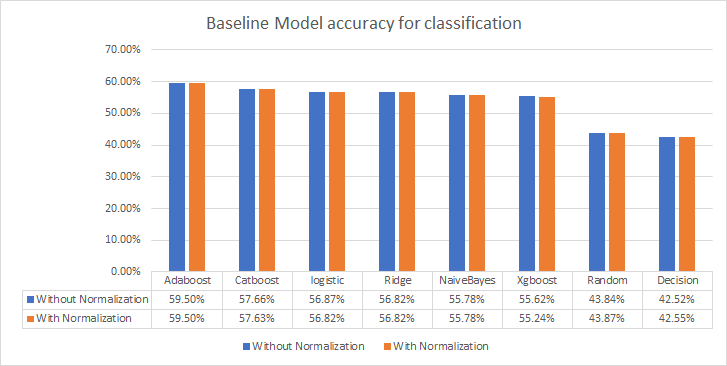